In [163]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from datetime import timedelta
from collections import Counter
import numpy as np
import re
from itertools import chain
from scipy.spatial.distance import cosine
import string
import timeit
import nltk
from nltk.corpus import stopwords

file_path = "/Volumes/DockerDrive/"

In [4]:
%%time
questions_text = pd.read_csv(file_path+"question_txt_2017.csv")

CPU times: user 42.3 s, sys: 29.2 s, total: 1min 11s
Wall time: 1min 23s


In [160]:
questions_text.head(100)

,Id,Body,Title,paragraph_count,code_count,pre_count,tag_count,img_count,href_count,title_count,has_questionmark
0,41412454,<p>I have a problem with the following piece o...,Update on 2 or more tables,3,2,2,7,0,0,3,False
1,41412456,"<p>I am using fabric, which is a deployment to...",A expect script with multiple shell statements,5,5,1,11,0,0,6,False
2,41412462,"<p>To recreate the issue, I forked the Angular...",While bootstrapping a hybrid angular 1 + 2 app...,10,6,5,22,0,0,11,True
3,41412463,<p>I have a global variable\r\n<code>global.lo...,Is Javascript's setInterval killed when the pa...,4,7,2,13,0,0,7,True
4,41412466,<p>I have an android app to show <code>Karaoke...,Adapter not notifyDataSetChanged immediately?,5,7,2,14,0,1,3,True
5,41412468,<p>I'm trying to wrap my head around an MySQL ...,Column name as Boolean? What does it mean?,9,8,4,24,0,2,5,True
6,41412470,<p>I have an array and when I try to append a ...,Appending a string to each item of an array,5,3,3,11,0,0,4,False
7,41412471,<p>I just started working with Tableau and I f...,Tableau: how can I filter dimensions/metrics o...,5,0,0,5,0,0,9,False
8,41412472,"<p><img src=""https://i.stack.imgur.com/FAKFs.p...",How can I change the background-color in betwe...,3,6,0,9,0,0,7,True
9,41412475,<p>I'm making a clickable dropdown menu. But w...,"javascript only works in <script> tags, not js...",1,1,1,3,0,0,6,False


In [134]:
en_stops = set(stopwords.words('english'))
table = str.maketrans({key: None for key in string.punctuation})

def count_tag(string, tag):
    return(len(re.findall('\<'+tag+'\>', string)))

def count_paragraph(string):
    return(count_tag(string, 'p'))

def count_code(string):
    return(count_tag(string, 'code'))

def count_pre(string):
    return(count_tag(string, 'pre'))

def count_all_tags(string):
    return(len(re.findall('\<[a-zA-Z]+\>', string)))

def count_img(string):
    img_pattern = '\<a href=\"https?://(?:[-\w.]|(?:%[\da-fA-F]{2})|/)+\.(?:png|jpg|gif|jpeg)\"'
    return(len(re.findall(img_pattern, string)))
#test   
#print(has_img('<a href="https://i.stack.imgur.com/kxrOZ.png"'))
    
def count_href(string):
    href_pattern = '\<a href=\"https?://(?:[-\w.]|(?:%[\da-fA-F]{2})|/)+\"'
    return(len(re.findall(href_pattern, string)))

def count_word(string):
    return(len([word for word in string.translate(table).split() if word not in en_stops]))

def count_questionmark(string):
    return(len(re.findall('\?', string)))

In [158]:
%timeit [word for word in nltk.word_tokenize(questions_text.Title[2].translate(table)) if word not in en_stops]
%timeit [word for word in questions_text.Title[2].translate(table).split() if word not in en_stops]

251 µs ± 22.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
48.7 µs ± 2.41 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [151]:
# check frequency of html tags
lst = []
for i, body in enumerate(questions_text.Body[1:100000]):
    lst += re.findall('\<[a-zA-Z]+\>', body)
print(pd.Series(lst).value_counts())

<p>             450999
<code>          258340
<pre>           140998
<strong>         34736
<li>             22231
<br>              8865
<blockquote>      8724
<em>              8503
<ul>              4359
<ol>              3215
<hr>              2121
<kbd>              345
<b>                345
<sup>              102
<i>                 90
<sub>               73
<Br>                34
<BR>                34
<s>                 26
<strike>            24
<del>               13
<bR>                 5
<P>                  4
<PRE>                1
<Blockquote>         1
<Strong>             1
<B>                  1
<Code>               1
dtype: int64


In [ ]:
%time questions_text['paragraph_count'] = [min(count_paragraph(txt), 50) for txt in questions_text.Body]
%time questions_text['code_count'] = [count_code(txt) for txt in questions_text.Body]
%time questions_text['pre_count'] = [count_pre(txt) for txt in questions_text.Body]
%time questions_text['tag_count'] = [count_all_tags(txt) for txt in questions_text.Body]
%time questions_text['img_count'] = [count_img(txt) for txt in questions_text.Body]
%time questions_text['href_count'] = [count_href(txt) for txt in questions_text.Body]
%time questions_text['title_count'] = [count_word(txt) for txt in questions_text.Title]
%time questions_text['has_questionmark'] = [count_questionmark(txt)>0 for txt in questions_text.Title]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2fb39240>,
      dtype=object)

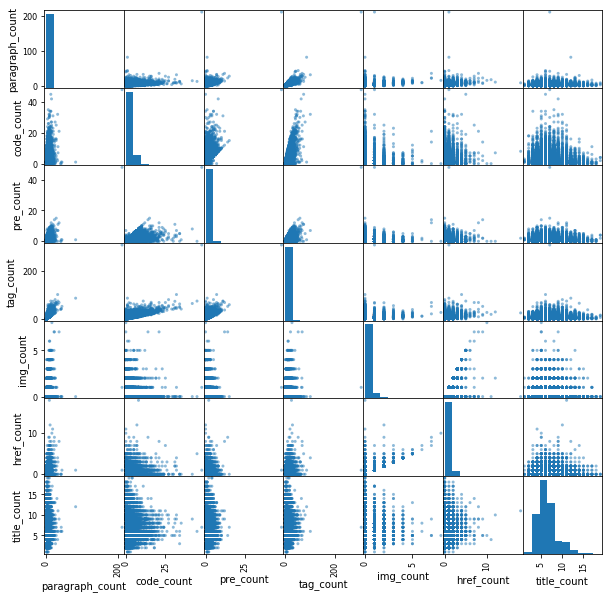

In [167]:
pd.plotting.scatter_matrix(questions_text.sample(frac=0.01)[
    ['paragraph_count', 'code_count', 'pre_count', 'tag_count', 
     'img_count', 'href_count', 'title_count']
], figsize = (10, 10))
plt.show()